In [3]:
import numpy as np
import pandas as pd
import statistics as st
import glob
from pathlib import Path
import scipy.stats as spt

import matplotlib.pyplot as plt
from matplotlib.projections import PolarAxes
import mpl_toolkits.axisartist.grid_finder as gf
import mpl_toolkits.axisartist.floating_axes as fa

In [4]:
air=pd.read_csv("/home/nishu/my_projects/NMP/22_08_22/insdata_22_08_2022/EH_ins_data.csv")
air=air.drop(air.index[115:129],0)
print(air)
refstdev=st.stdev(air['ppd'])
print("reference std dev = ",refstdev)

folder="/home/nishu/my_projects/NMP/22_08_22/Future_Projection_Himlaya_2_8_2022/rawdata_409157_EH45/monthly_1850_2005"
for file in Path(folder).glob('*.txt'):
    df = pd.read_csv(file)
    df=df.drop(df.index[0:41],0)
    print(df)
    msd=st.stdev(df['ppanmly'])
    print(file)
    print("std dev = ",msd)
    corr,_=spt.pearsonr(air['ppd'],df['ppanmly'])
    print("correlation coefficient = ", corr)

     year    JAN    FEB    MAR     APR     MAY     JUN     JUL     AUG  \
0    1891  15.00  30.22  58.20   62.48  214.14  225.04  308.21  285.64   
1    1892  10.28  32.17  42.39  121.35  233.35  307.18  398.33  402.42   
2    1893  18.27  26.31  37.67  136.49  120.40  291.03  348.02  303.06   
3    1894   7.50  37.96  29.65   87.76  133.24  273.94  237.65  351.60   
4    1895   9.75  19.68  34.68   95.39  178.90  217.09  408.01  345.44   
..    ...    ...    ...    ...     ...     ...     ...     ...     ...   
110  2001   6.79  20.58  25.50   92.04  185.75  256.63  265.99  265.25   
111  2002  21.01  14.64  42.23  112.28  127.88  228.97  425.83  268.72   
112  2003  14.96  35.09  49.38   93.61  115.23  304.26  367.68  259.46   
113  2004  16.23  14.12  42.52  128.04  211.41  264.62  442.88  223.09   
114  2005  22.18  22.80  66.07   92.09  132.62  195.67  288.10  325.82   

        SEP     OCT    NOV    DEC  Monsoon        ppd  
0    132.34   39.91   8.83   6.51   951.23  10.339463  

      ppanmly  year
41   0.921505  1891
42   2.273910  1892
43  -0.420392  1893
44   1.149400  1894
45  -1.185660  1895
..        ...   ...
151  1.118880  2001
152 -1.699870  2002
153 -2.360280  2003
154  0.784708  2004
155 -0.942156  2005

[115 rows x 2 columns]
/home/nishu/my_projects/NMP/22_08_22/Future_Projection_Himlaya_2_8_2022/rawdata_409157_EH45/monthly_1850_2005/time_pr_Amon_NorESM1-ME_rcp45_r1i1p1_26-30N_84.3-95.6E_anom_1986_2005_mon6_ave4_dump0.txt
std dev =  1.6603653724842935
correlation coefficient =  -0.05306381660272058
      ppanmly  year
41  -2.882780  1891
42   2.195970  1892
43   3.478780  1893
44  -1.709050  1894
45  -3.083590  1895
..        ...   ...
151 -0.235425  2001
152  0.377135  2002
153  0.324219  2003
154  0.859400  2004
155  0.217644  2005

[115 rows x 2 columns]
/home/nishu/my_projects/NMP/22_08_22/Future_Projection_Himlaya_2_8_2022/rawdata_409157_EH45/monthly_1850_2005/time_pr_Amon_NorESM1-M_rcp45_r1i1p1_26-30N_84.3-95.6E_anom_1986_2005_mon6_ave4_dump0

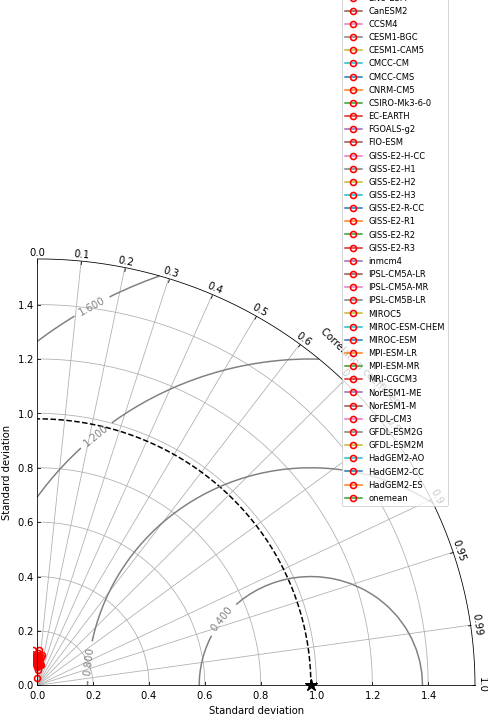

In [12]:
class TaylorDiagram(object):
  def __init__(self, STD ,fig=None, rect=111, label='_'):
    self.STD = STD
    tr = PolarAxes.PolarTransform()
    # Correlation labels
    rlocs = np.concatenate(((np.arange(11.0) / 10.0), [0.95, 0.99]))
    tlocs = np.arccos(rlocs) # Conversion to polar angles
    gl1 = gf.FixedLocator(tlocs) # Positions
    tf1 = gf.DictFormatter(dict(zip(tlocs, map(str, rlocs))))
    # Standard deviation axis extent
    self.smin = 0
    self.smax = 1.6 * self.STD
    gh = fa.GridHelperCurveLinear(tr,extremes=(0,(np.pi/2),self.smin,self.smax),grid_locator1=gl1,tick_formatter1=tf1,)
    if fig is None:
      fig = plt.figure()
    ax = fa.FloatingSubplot(fig, rect, grid_helper=gh)
    fig.add_subplot(ax)
    # Angle axis
    ax.axis['top'].set_axis_direction('bottom')
    ax.axis['top'].label.set_text("Correlation coefficient")
    ax.axis['top'].toggle(ticklabels=True, label=True)
    ax.axis['top'].major_ticklabels.set_axis_direction('top')
    ax.axis['top'].label.set_axis_direction('top')
    # X axis
    ax.axis['left'].set_axis_direction('bottom')
    ax.axis['left'].label.set_text("Standard deviation")
    ax.axis['left'].toggle(ticklabels=True, label=True)
    ax.axis['left'].major_ticklabels.set_axis_direction('bottom')
    ax.axis['left'].label.set_axis_direction('bottom')
    # Y axis
    ax.axis['right'].set_axis_direction('top')
    ax.axis['right'].label.set_text("Standard deviation")
    ax.axis['right'].toggle(ticklabels=True, label=True)
    ax.axis['right'].major_ticklabels.set_axis_direction('left')
    ax.axis['right'].label.set_axis_direction('top')
    # Useless
    ax.axis['bottom'].set_visible(False)
    # Contours along standard deviations
    ax.grid()
    self._ax = ax # Graphical axes
    self.ax = ax.get_aux_axes(tr) # Polar coordinates
    # Add reference point and STD contour
    l , = self.ax.plot([0], self.STD, 'k*', ls='', ms=12, label=label)
    l1 , = self.ax.plot([0], self.STD, 'k*', ls='', ms=12, label=label)
    t = np.linspace(0, (np.pi / 2.0))
    t1 = np.linspace(0, (np.pi / 2.0))
    r = np.zeros_like(t) + self.STD
    r1 = np.zeros_like(t) + self.STD
    self.ax.plot(t, r, 'k--', label='_')
    # Collect sample points for latter use (e.g. legend)
    self.samplePoints = [l]
    self.samplePoints = [l1]
  def add_sample(self,STD,r,*args,**kwargs):
    l,= self.ax.plot(np.arccos(r), STD, *args, **kwargs) # (theta, radius)
    self.samplePoints.append(l)
    return l

  def add_sample(self,STD,r1,*args,**kwargs):
    l1,= self.ax.plot(np.arccos(r1), STD, *args, **kwargs) # (theta, radius)
    self.samplePoints.append(l1)
    return l1

  def add_contours(self,levels=5,**kwargs):
    rs, ts = np.meshgrid(np.linspace(self.smin, self.smax), np.linspace(0, (np.pi / 2.0)))
    RMSE=np.sqrt(np.power(self.STD, 2) + np.power(rs, 2) - (2.0 * self.STD * rs  *np.cos(ts)))
    contours = self.ax.contour(ts, rs, RMSE, levels, **kwargs)
    return contours

def srl(obsSTD, s, s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11, s12, s13, s14, s15, s16, s17,s18,s19,s20,s21,s22,s23,s24,s25,s26,s27,s28,s29,s30,s31,s32,s33,s34,s35,s36,s37,s38,s39,s40,s41,s42, r, r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r14,r15,r16,r17,r18,r19,r20,r21,r22,r23,r24,r25,r26,r27,r28,r29,r30,r31,r32,r33,r34,r35,r36,r37,r38,r39,r40,r41,r42, l,l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,l11,l12,l13,l14,l15,l16,l17,l18,l19,l20,l21,l22,l23,l24,l25,l26,l27,l28,l29,l30,l31,l32,l33,l34,l35,l36,l37,l38,l39,l40,l41,l42, fname):
  fig=plt.figure(figsize=(8,8))
  dia=TaylorDiagram(obsSTD, fig=fig, rect=111, label='ref')
  plt.clabel(dia.add_contours(colors='#808080'), inline=1, fontsize=10)
  srlc = zip(s, r, l)
  srlc1 = zip(s1, r1, l1)
  srlc2 = zip(s2, r2, l2)
  srlc3 = zip(s3, r3, l3)
  srlc4 = zip(s4, r4, l4)
  srlc5 = zip(s5, r5, l5)
  srlc6 = zip(s6, r6, l6)
  srlc7 = zip(s7, r7, l7)
  srlc8 = zip(s8, r8, l8)
  srlc9 = zip(s9, r9, l9)
  srlc10 = zip(s10, r10, l10)
  srlc11 = zip(s11, r11, l11)
  srlc12 = zip(s12, r12, l12)
  srlc13 = zip(s13, r13, l13)
  srlc14 = zip(s14, r14, l14)
  srlc15 = zip(s15, r15, l15)
  srlc16 = zip(s16, r16, l16)
  srlc17 = zip(s17, r17, l17)
  srlc18 = zip(s18, r18, l18)
  srlc19 = zip(s19, r19, l19)
  srlc20 = zip(s20, r20, l20)
  srlc21 = zip(s21, r21, l21)
  srlc22 = zip(s22, r22, l22)
  srlc23 = zip(s23, r23, l23)
  srlc24 = zip(s24, r24, l24)
  srlc25 = zip(s25, r25, l25)
  srlc26 = zip(s26, r26, l26)
  srlc27 = zip(s27, r27, l27)
  srlc28 = zip(s28, r28, l28)
  srlc29 = zip(s29, r29, l29)
  srlc30 = zip(s30, r30, l30)
  srlc31 = zip(s31, r31, l31)
  srlc32 = zip(s32, r32, l32)
  srlc33 = zip(s33, r33, l33)
  srlc34 = zip(s34, r34, l34)
  srlc35 = zip(s35, r35, l35)
  srlc36 = zip(s36, r36, l36)
  srlc37 = zip(s37, r37, l37)
  srlc38 = zip(s38, r38, l38)
  srlc39 = zip(s39, r39, l39)
  srlc40 = zip(s40, r40, l40)
  srlc41 = zip(s41, r41, l41)
  srlc42 = zip(s42, r42, l42)

   
  for i in srlc:
    dia.add_sample(i[0], i[1], label=i[2], marker='o',mec = 'red', mfc = 'none', mew=1.6)
    
  for i in srlc1:
    dia.add_sample(i[0], i[1], label=i[2], marker='o',mec = 'red', mfc = 'none', mew=1.6)
  for i in srlc2:
    dia.add_sample(i[0], i[1], label=i[2], marker='o',mec = 'red', mfc = 'none', mew=1.6)
  for i in srlc3:
    dia.add_sample(i[0], i[1], label=i[2], marker='o',mec = 'red', mfc = 'none', mew=1.6)
  for i in srlc4:
    dia.add_sample(i[0], i[1], label=i[2], marker='o',mec = 'red', mfc = 'none', mew=1.6)
  for i in srlc5:
    dia.add_sample(i[0], i[1], label=i[2], marker='o',mec = 'red', mfc = 'none', mew=1.6)
  for i in srlc6:
    dia.add_sample(i[0], i[1], label=i[2], marker='o',mec = 'red', mfc = 'none', mew=1.6)
  for i in srlc7:
    dia.add_sample(i[0], i[1], label=i[2], marker='o',mec = 'red', mfc = 'none', mew=1.6)
  for i in srlc8:
    dia.add_sample(i[0], i[1], label=i[2], marker='o',mec = 'red', mfc = 'none', mew=1.6)
  for i in srlc9:
    dia.add_sample(i[0], i[1], label=i[2], marker='o',mec = 'red', mfc = 'none', mew=1.6)
  for i in srlc10:
    dia.add_sample(i[0], i[1], label=i[2], marker='o',mec = 'red', mfc = 'none', mew=1.6)
  for i in srlc11:
    dia.add_sample(i[0], i[1], label=i[2], marker='o',mec = 'red', mfc = 'none', mew=1.6)
  for i in srlc12:
    dia.add_sample(i[0], i[1], label=i[2], marker='o',mec = 'red', mfc = 'none', mew=1.6)
  for i in srlc13:
    dia.add_sample(i[0], i[1], label=i[2], marker='o',mec = 'red', mfc = 'none', mew=1.6)
  for i in srlc14:
    dia.add_sample(i[0], i[1], label=i[2], marker='o',mec = 'red', mfc = 'none', mew=1.6)
  for i in srlc15:
    dia.add_sample(i[0], i[1], label=i[2], marker='o',mec = 'red', mfc = 'none', mew=1.6)
  for i in srlc16:
    dia.add_sample(i[0], i[1], label=i[2], marker='o',mec = 'red', mfc = 'none', mew=1.6)
  for i in srlc17:
    dia.add_sample(i[0], i[1], label=i[2], marker='o',mec = 'red', mfc = 'none', mew=1.6)
  for i in srlc18:
    dia.add_sample(i[0], i[1], label=i[2], marker='o',mec = 'red', mfc = 'none', mew=1.6)
  for i in srlc19:
    dia.add_sample(i[0], i[1], label=i[2], marker='o',mec = 'red', mfc = 'none', mew=1.6)
  for i in srlc20:
    dia.add_sample(i[0], i[1], label=i[2], marker='o',mec = 'red', mfc = 'none', mew=1.6)
  for i in srlc21:
    dia.add_sample(i[0], i[1], label=i[2], marker='o',mec = 'red', mfc = 'none', mew=1.6)
  for i in srlc22:
    dia.add_sample(i[0], i[1], label=i[2], marker='o',mec = 'red', mfc = 'none', mew=1.6)
  for i in srlc23:
    dia.add_sample(i[0], i[1], label=i[2], marker='o',mec = 'red', mfc = 'none', mew=1.6)
  for i in srlc24:
    dia.add_sample(i[0], i[1], label=i[2], marker='o',mec = 'red', mfc = 'none', mew=1.6)
  for i in srlc25:
    dia.add_sample(i[0], i[1], label=i[2], marker='o',mec = 'red', mfc = 'none', mew=1.6)
  for i in srlc26:
    dia.add_sample(i[0], i[1], label=i[2], marker='o',mec = 'red', mfc = 'none', mew=1.6)
  for i in srlc27:
    dia.add_sample(i[0], i[1], label=i[2], marker='o',mec = 'red', mfc = 'none', mew=1.6)
  for i in srlc28:
    dia.add_sample(i[0], i[1], label=i[2], marker='o',mec = 'red', mfc = 'none', mew=1.6)
  for i in srlc29:
    dia.add_sample(i[0], i[1], label=i[2], marker='o',mec = 'red', mfc = 'none', mew=1.6)
  for i in srlc30:
    dia.add_sample(i[0], i[1], label=i[2], marker='o',mec = 'red', mfc = 'none', mew=1.6)
  for i in srlc31:
    dia.add_sample(i[0], i[1], label=i[2], marker='o',mec = 'red', mfc = 'none', mew=1.6)
  for i in srlc32:
    dia.add_sample(i[0], i[1], label=i[2], marker='o',mec = 'red', mfc = 'none', mew=1.6)
  for i in srlc33:
    dia.add_sample(i[0], i[1], label=i[2], marker='o',mec = 'red', mfc = 'none', mew=1.6)
  for i in srlc34:
    dia.add_sample(i[0], i[1], label=i[2], marker='o',mec = 'red', mfc = 'none', mew=1.6)
  for i in srlc35:
    dia.add_sample(i[0], i[1], label=i[2], marker='o',mec = 'red', mfc = 'none', mew=1.6)
  for i in srlc36:
    dia.add_sample(i[0], i[1], label=i[2], marker='o',mec = 'red', mfc = 'none', mew=1.6)
  for i in srlc37:
    dia.add_sample(i[0], i[1], label=i[2], marker='o',mec = 'red', mfc = 'none', mew=1.6)
  for i in srlc38:
    dia.add_sample(i[0], i[1], label=i[2], marker='o',mec = 'red', mfc = 'none', mew=1.6)
  for i in srlc39:
    dia.add_sample(i[0], i[1], label=i[2], marker='o',mec = 'red', mfc = 'none', mew=1.6)
  for i in srlc40:
    dia.add_sample(i[0], i[1], label=i[2], marker='o',mec = 'red', mfc = 'none', mew=1.6)
  for i in srlc41:
    dia.add_sample(i[0], i[1], label=i[2], marker='o',mec = 'red', mfc = 'none', mew=1.6)
  for i in srlc42:
    dia.add_sample(i[0], i[1], label=i[2], marker='o',mec = 'red', mfc = 'none', mew=1.6)

#   for i in srlc1:
#     dia.add_sample(i[0], i[1], label=i[2], marker='^', mec = 'blue', mfc = 'none', mew=1.6)
  spl = [p.get_label() for p in dia.samplePoints]
  fig.legend(dia.samplePoints, spl, numpoints=1, prop=dict(size='small'), loc=[0.7,0.3])
  plt.show()

obsSTD = 0.9798640955784373

s = [0.10012565297175872]
s1 = [0.12888770839697786]
s2 = [0.09282214221255802]
s3 = [0.0970457940322539]
s4 = [0.10111175881680831]
s5 = [0.0916167095538827]
s6 = [0.13049983586662356]
s7 = [0.10169281787889163]
s8 = [0.10221592493081925]
s9 = [0.09035271384687404]
s10 = [0.11699870431358687]
s11 = [0.08353830376798889]
s12 = [0.1103791058021095]
s13 = [0.0729847531064309]
s14 = [0.05545489468771521]
s15 = [0.09527399275282954]
s16 = [0.0715617525875253]
s17 = [0.0747070005839174]
s18 = [0.07389411184055279]
s19 = [0.06590730190876953]
s20 = [0.07309762438478201]
s21 = [0.07913287344453605]
s22 = [0.07580589559041714]
s23 = [0.08339235059645735]
s24 = [0.10015782946046539]
s25 = [0.09267944992797338]
s26 = [0.09255533809858449]
s27 = [0.08338004255798925]
s28 = [0.0916895994514718]
s29 = [0.08152337601449403]
s30 = [0.0735045086713656]
s31 = [0.08860504444213649]
s32 = [0.08610599687877901]
s33 = [0.08817738900679993]
s34 = [0.10461270410580287]
s35 = [0.11179858630709028]
s36 = [0.11439566519867078]
s37 = [0.1088936608828663]
s38 = [0.1180243909482714]
s39 = [0.10499003497802359]
s40 = [0.10178122175570412]
s41 = [0.10507323947139592]
s42 = [0.025962050075329018]


r = [0.038863295599515485]
r1 = [0.038127106806822623]
r2 = [-0.14739023329367557]
r3 = [-0.0847278810382424]
r4 = [-0.08706158482310743]
r5 = [0.022121920458677592]
r6 = [-0.11364905913369795]
r7 = [-0.03567381406694263]
r8 = [-0.0923729158074154]
r9 = [0.010891834912872558]
r10 = [-0.17047495285212405]
r11 = [-0.04739171261947406]
r12 = [0.0396258087931763]
r13 = [0.009089967159896517]
r14 = [0.03895746256577459]
r15 = [-0.13193585558152765]
r16 = [0.0054424987277563695]
r17 = [0.033858412554415754]
r18 = [0.1316593985087428]
r19 = [-0.026316831062173977]
r20 = [-0.011072501338368089]
r21 = [-0.07171902232068303]
r22 = [0.1816421036629726]
r23 = [-0.0029744826531619]
r24 = [0.05719820378337602]
r25 = [0.0249658539163782]
r26 = [0.08852720589602019]
r27 = [0.008342704464617016]
r28 = [0.0366099735995453]
r29 = [0.01794491670951929]
r30 = [0.06472224023773761]
r31 = [-0.12671333710041022]
r32 = [-0.10800121842113228]
r33 = [-0.039255387371564684]
r34 = [-0.06362282041407628]
r35 = [-0.03312418534583636]
r36 = [0.1468847670908498]
r37 = [0.029101284197779485]
r38 = [0.02948664653663508]
r39 = [0.13885628433385333]
r40 = [-0.018412727591918802]
r41 = [0.014734494588289931]
r42 = [-0.011107830671348996]



l = ["ACCESS1-0"]
l1 = ["ACCESS1-3"]
l2 = ["bcc-csm1-1-m"]
l3 = ["csm1-1"]
l4 = ["BNU-ESM"]
l5 = ["CanESM2"]
l6 = ["CCSM4"]
l7 = ["CESM1-BGC"]
l8 = ["CESM1-CAM5"]
l9 = ["CMCC-CM"]
l10 = ["CMCC-CMS"]
l11 = ["CNRM-CM5"]
l12 = ["CSIRO-Mk3-6-0"]
l13 = ["EC-EARTH"]
l14 = ["FGOALS-g2"]
l15 = ["FIO-ESM"]
l16 = ["GISS-E2-H-CC"]
l17 = ["GISS-E2-H1"]
l18 = ["GISS-E2-H2"]
l19 = ["GISS-E2-H3"]
l20 = ["GISS-E2-R-CC"]
l21 = ["GISS-E2-R1"]
l22 = ["GISS-E2-R2"]
l23 = ["GISS-E2-R3"]
l24 = ["inmcm4"]
l25 = ["IPSL-CM5A-LR"]
l26 = ["IPSL-CM5A-MR"]
l27 = ["IPSL-CM5B-LR"]
l28 = ["MIROC5"]
l29 = ["MIROC-ESM-CHEM"]
l30 = ["MIROC-ESM"]
l31 = ["MPI-ESM-LR"]
l32 = ["MPI-ESM-MR"]
l33 = ["MRI-CGCM3"]
l34 = ["NorESM1-ME"]
l35 = ["NorESM1-M"]
l36 = ["GFDL-CM3"]
l37 = ["GFDL-ESM2G"]
l38 = ["GFDL-ESM2M"]
l39 = ["HadGEM2-AO"]
l40 = ["HadGEM2-CC"]
l41 = ["HadGEM2-ES"]
l42 = ["onemean"]

fname = 'TaylorDiagram.jpg'
srl(obsSTD, s, s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11, s12, s13, s14, s15, s16, s17, s18, s19, s20, s21, s22, s23, s24, s25, s26, s27, s28, s29, s30, s31, s32, s33, s34, s35, s36, s37, s38, s39, s40, s41, s42, r, r1, r2, r3, r4, r5, r6, r7, r8, r9, r10, r11, r12, r13, r14, r15, r16, r17, r18, r19, r20, r21, r22, r23, r24, r25, r26, r27, r28, r29, r30, r31, r32, r33, r34, r35, r36, r37, r38, r39, r40, r41, r42, l, l1, l2, l3, l4, l5, l6, l7, l8, l9, l10, l11, l12, l13, l14, l15, l16, l17, l18, l19, l20, l21, l22, l23, l24, l25, l26, l27, l28,l29,l30,l31,l32,l33,l34,l35,l36,l37,l38,l39,l40,l41,l42, fname)